In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

/Users/tanmaybhardwaj/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
profits_data = pd.read_csv("all_flights_profits_data.csv")

/var/folders/5s/bzn_bky51k3bk9glk6bcxst40000gn/T/ipykernel_36076/1257255942.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  profits_data = pd.read_csv("all_flights_profits_data.csv")


In [3]:
# To analyse which routes to recommend, we will take average of profts, arrival delay and departure delay for a particular route. We will also consider fare confidence for a route

profits_data = profits_data.groupby(['ORIGIN', 'DESTINATION','fare_confidence'])[['profit','DEP_DELAY','ARR_DELAY']].mean().reset_index()

In [4]:
profits_data

,ORIGIN,DESTINATION,fare_confidence,profit,DEP_DELAY,ARR_DELAY
0,ABE,ATL,6.666667,46719.126281,5.981567,5.460829
1,ABE,CLT,3.333333,52713.193828,3.812749,4.254980
2,ABE,DTW,1.153846,29743.633065,15.971774,10.689516
3,ABE,FLL,6.666667,5795.600769,13.600000,10.850000
4,ABE,ORD,2.179487,58349.954806,21.729560,15.012579
...,...,...,...,...,...,...
5618,YAK,CDV,0.256410,-7272.099036,-3.771084,-3.875000
5619,YAK,JNU,2.820513,37529.537686,-13.340909,-14.261905
5620,YKM,SEA,2.051282,18139.306721,11.622951,11.495082
5621,YUM,DFW,0.512821,35854.075714,16.000000,15.464286


In [5]:
df = profits_data

In [6]:
# a good round trip recommendation will be that route which has good profit, minimum arrival and departure delay and also good fare confidence

In [7]:
# Store the original min and max values for each column
original_min_max = {
    'profit': (df['profit'].min(), df['profit'].max()),
    'fare_confidence': (df['fare_confidence'].min(), df['fare_confidence'].max()),
    'DEP_DELAY': (df['DEP_DELAY'].min(), df['DEP_DELAY'].max()),
    'ARR_DELAY': (df['ARR_DELAY'].min(), df['ARR_DELAY'].max())
}

# Normalize the columns
scaler = MinMaxScaler()
df[['profit', 'fare_confidence', 'DEP_DELAY', 'ARR_DELAY']] = scaler.fit_transform(df[['profit', 'fare_confidence', 'DEP_DELAY', 'ARR_DELAY']])

# Define weights for each criterion
weights = {
    'profit': 0.38,            # Higher weight for profit
    'fare_confidence': 0.32,   # High weight for fare confidence
    'DEP_DELAY': -0.15,       # Negative weight for departure delay
    'ARR_DELAY': -0.15        # Negative weight for arrival delay
}

# Calculate the composite score for each row
df['score'] = (
    weights['profit'] * df['profit'] +
    weights['fare_confidence'] * df['fare_confidence'] +
    weights['DEP_DELAY'] * (1 - df['DEP_DELAY']) +  # Inverting delay values for scoring
    weights['ARR_DELAY'] * (1 - df['ARR_DELAY'])    # Inverting delay values for scoring
)

# Sort the DataFrame based on the composite score
df_sorted = df.sort_values(by='score', ascending=False).reset_index(drop=True)

# Denormalize the columns
for col in ['profit', 'fare_confidence', 'DEP_DELAY', 'ARR_DELAY']:
    min_val, max_val = original_min_max[col]
    df_sorted[col] = df_sorted[col] * (max_val - min_val) + min_val

# Display the top rows with the highest scores
print(df_sorted.head(20))

   ORIGIN DESTINATION  fare_confidence         profit   DEP_DELAY   ARR_DELAY  \
0     EGE         JFK         0.128205  247699.923125   48.375000   45.929825   
1     JFK         LAX       100.000000   49986.248787    5.010133   -0.071338   
2     ORD         LGA        92.179487   18887.823049   22.470112   20.544056   
3     FLO         CLT         0.256410  244439.235777    5.513944    2.438247   
4     HNL         GUM         1.538462  242466.321894    5.159091    0.068182   
5     JFK         SFO        87.692308   37255.596526   14.433871    8.389794   
6     ORD         LAX        88.205128   22770.340072   15.893915   10.244060   
7     EWR         SFO        73.333333   50851.801852   21.526403   17.062396   
8     AUS         CMH         7.435897   26096.928966  217.000000  216.000000   
9     ORD         SFO        72.307692   39188.682847   27.618350   26.010828   
10    MSP         MCO        88.589744   18376.553810   11.343949    3.441083   
11    MSP         PHX       

In [8]:
#Multiplying profit and confidence to make a single metric
#Taking average of arr and dep delay
df_sorted_top_20 = df_sorted.head(20)
df_sorted_top_20['ROUTE'] = df_sorted_top_20['ORIGIN']+'-'+df_sorted_top_20['DESTINATION']
df_sorted_top_20['profit * confidence'] = df_sorted_top_20['profit'] * df_sorted_top_20['fare_confidence']
df_sorted_top_20['delay'] = (df_sorted_top_20['DEP_DELAY'] + df_sorted_top_20['ARR_DELAY']) / 2

/var/folders/5s/bzn_bky51k3bk9glk6bcxst40000gn/T/ipykernel_36076/1342354374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_top_20['ROUTE'] = df_sorted_top_20['ORIGIN']+'-'+df_sorted_top_20['DESTINATION']
/var/folders/5s/bzn_bky51k3bk9glk6bcxst40000gn/T/ipykernel_36076/1342354374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_top_20['profit * confidence'] = df_sorted_top_20['profit'] * df_sorted_top_20['fare_confidence']
/var/folders/5s/bzn_bky51k3bk9glk6bcxst40000gn/T/ipykernel

In [9]:

df_sorted_top_20

,ORIGIN,DESTINATION,fare_confidence,profit,DEP_DELAY,ARR_DELAY,score,ROUTE,profit * confidence,delay
0,EGE,JFK,0.128205,247699.923125,48.375000,45.929825,0.171878,EGE-JFK,3.175640e+04,47.152412
1,JFK,LAX,100.000000,49986.248787,5.010133,-0.071338,0.160750,JFK-LAX,4.998625e+06,2.469398
2,ORD,LGA,92.179487,18887.823049,22.470112,20.544056,0.115435,ORD-LGA,1.741070e+06,21.507084
3,FLO,CLT,0.256410,244439.235777,5.513944,2.438247,0.114840,FLO-CLT,6.267673e+04,3.976096
4,HNL,GUM,1.538462,242466.321894,5.159091,0.068182,0.114585,HNL-GUM,3.730251e+05,2.613636
5,JFK,SFO,87.692308,37255.596526,14.433871,8.389794,0.114504,JFK-SFO,3.267029e+06,11.411832
6,ORD,LAX,88.205128,22770.340072,15.893915,10.244060,0.097910,ORD-LAX,2.008461e+06,13.068988
7,EWR,SFO,73.333333,50851.801852,21.526403,17.062396,0.097115,EWR-SFO,3.729132e+06,19.294399
8,AUS,CMH,7.435897,26096.928966,217.000000,216.000000,0.092909,AUS-CMH,1.940541e+05,216.500000
9,ORD,SFO,72.307692,39188.682847,27.618350,26.010828,0.086644,ORD-SFO,2.833643e+06,26.814589


In [10]:
#now we only have two columns to compare. profit * confidence and average delay
#We want maximum profit * confidence and low delay value
#taking a ratio of these two columns to get the final metric to decide. Bigger this ratio, means a good recommendation.
df_sorted_top_20['ratio'] = df_sorted_top_20['profit * confidence'] / df_sorted_top_20['delay']

/var/folders/5s/bzn_bky51k3bk9glk6bcxst40000gn/T/ipykernel_36076/3197482002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_top_20['ratio'] = df_sorted_top_20['profit * confidence'] / df_sorted_top_20['delay']


In [13]:
top_5_recommended_routes = df_sorted_top_20.nlargest(5,'ratio')

/Users/tanmaybhardwaj/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tanmaybhardwaj/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


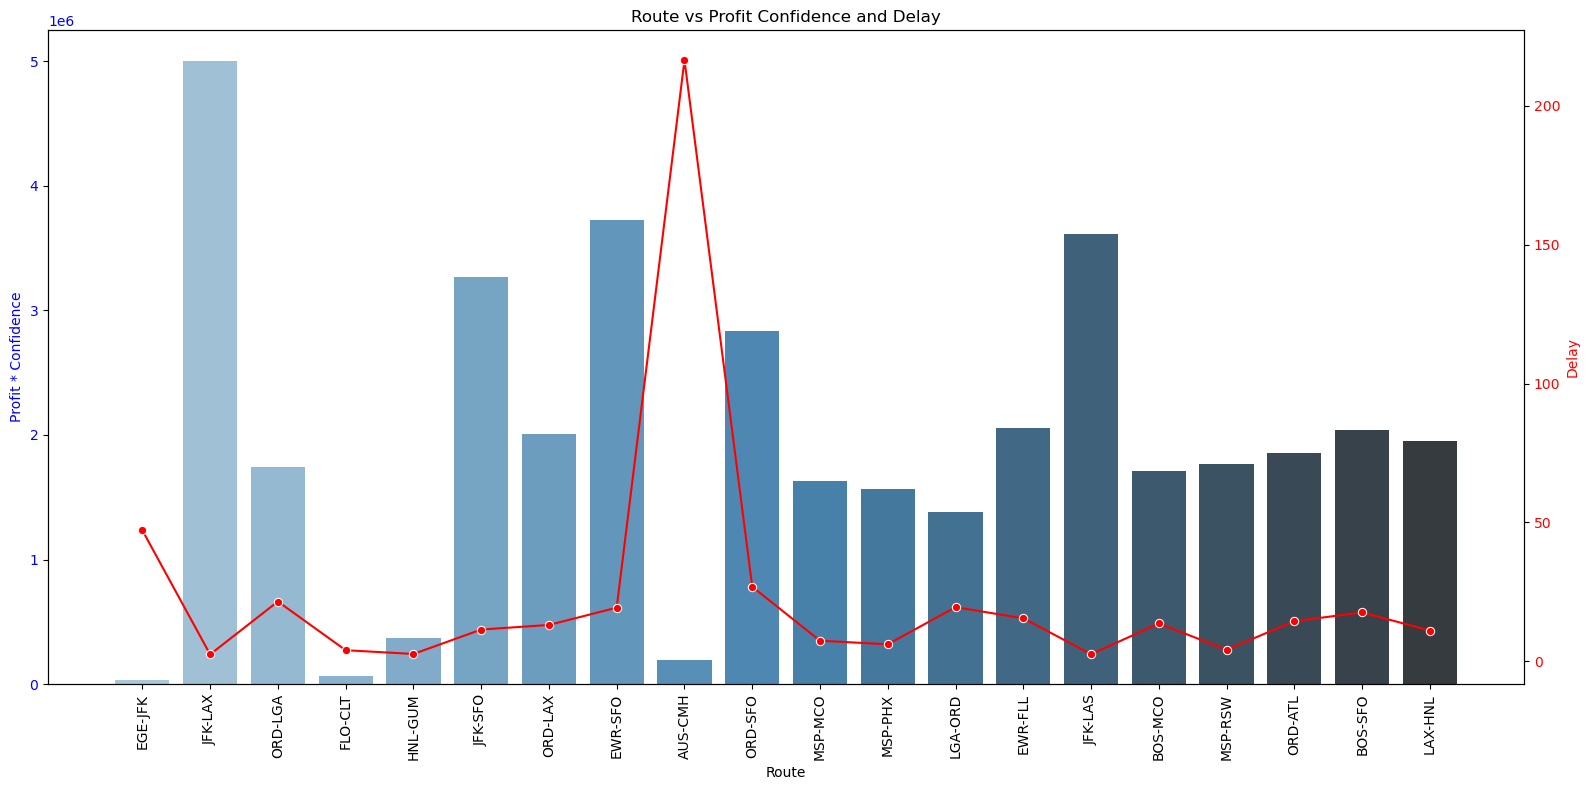

In [17]:
# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(16, 8))
# Plot the profit * confidence as bars
sns.barplot(x='ROUTE', y='profit * confidence', data=df_sorted_top_20, palette='Blues_d', ax=ax1)
ax1.set_xlabel('Route')
ax1.set_ylabel('Profit * Confidence', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(df_sorted_top_20['ROUTE'], rotation=90)

# Create a twin Axes sharing the x-axis for the delay
ax2 = ax1.twinx()
sns.lineplot(x='ROUTE', y='delay', data=df_sorted_top_20, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Delay', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding a title
plt.title('Route vs Profit Confidence and Delay')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
#Final 5 routes to recommend
top_5_recommended_routes

,ORIGIN,DESTINATION,fare_confidence,profit,DEP_DELAY,ARR_DELAY,score,ROUTE,profit * confidence,delay,ratio
1,JFK,LAX,100.000000,49986.248787,5.010133,-0.071338,0.160750,JFK-LAX,4.998625e+06,2.469398,2.024228e+06
14,JFK,LAS,70.128205,51580.793323,6.039036,-0.994226,0.067396,JFK-LAS,3.617268e+06,2.522405,1.434056e+06
16,MSP,RSW,80.384615,22010.416011,9.217054,-0.916667,0.061006,MSP-RSW,1.769299e+06,4.150194,4.263172e+05
5,JFK,SFO,87.692308,37255.596526,14.433871,8.389794,0.114504,JFK-SFO,3.267029e+06,11.411832,2.862844e+05
11,MSP,PHX,89.102564,17583.812399,9.485765,2.719751,0.085033,MSP-PHX,1.566763e+06,6.102758,2.567303e+05


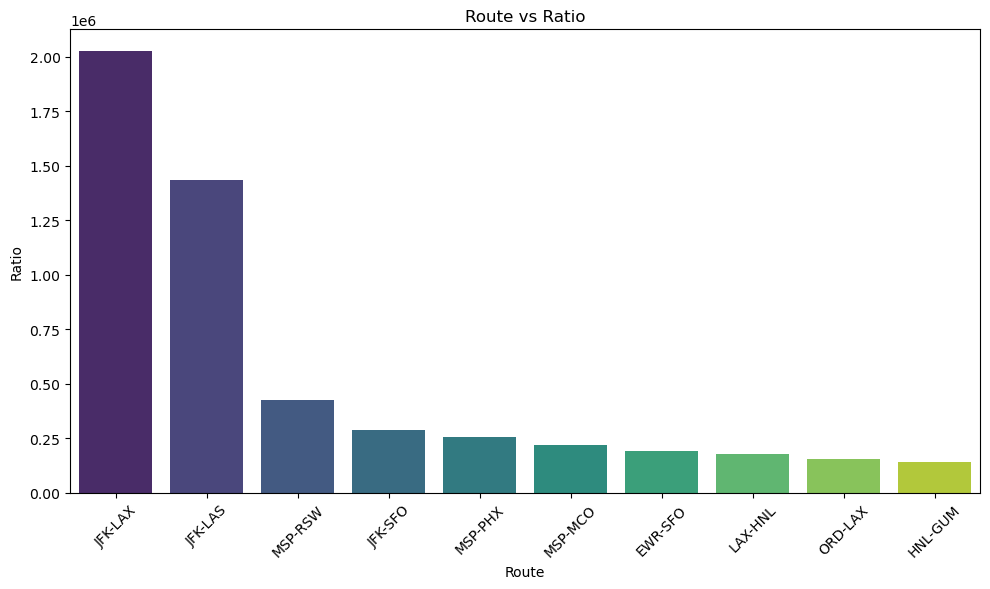

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the ratio as bars
sns.barplot(x='ROUTE', y='ratio', data=df_sorted_top_20.nlargest(10,'ratio'), palette='viridis')
plt.xlabel('Route')
plt.ylabel('Ratio')
plt.title('Route vs Ratio')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
# Calculate the number of flights needed to break even for each route
airplane_cost = 90_000_000
top_5_recommended_routes['break_even_flights'] = airplane_cost / top_5_recommended_routes['profit']

In [19]:
top_5_recommended_routes

,ORIGIN,DESTINATION,fare_confidence,profit,DEP_DELAY,ARR_DELAY,score,ROUTE,profit * confidence,delay,ratio,break_even_flights
1,JFK,LAX,100.000000,49986.248787,5.010133,-0.071338,0.160750,JFK-LAX,4.998625e+06,2.469398,2.024228e+06,1800.495180
14,JFK,LAS,70.128205,51580.793323,6.039036,-0.994226,0.067396,JFK-LAS,3.617268e+06,2.522405,1.434056e+06,1744.835513
16,MSP,RSW,80.384615,22010.416011,9.217054,-0.916667,0.061006,MSP-RSW,1.769299e+06,4.150194,4.263172e+05,4088.973146
5,JFK,SFO,87.692308,37255.596526,14.433871,8.389794,0.114504,JFK-SFO,3.267029e+06,11.411832,2.862844e+05,2415.744436
11,MSP,PHX,89.102564,17583.812399,9.485765,2.719751,0.085033,MSP-PHX,1.566763e+06,6.102758,2.567303e+05,5118.343961


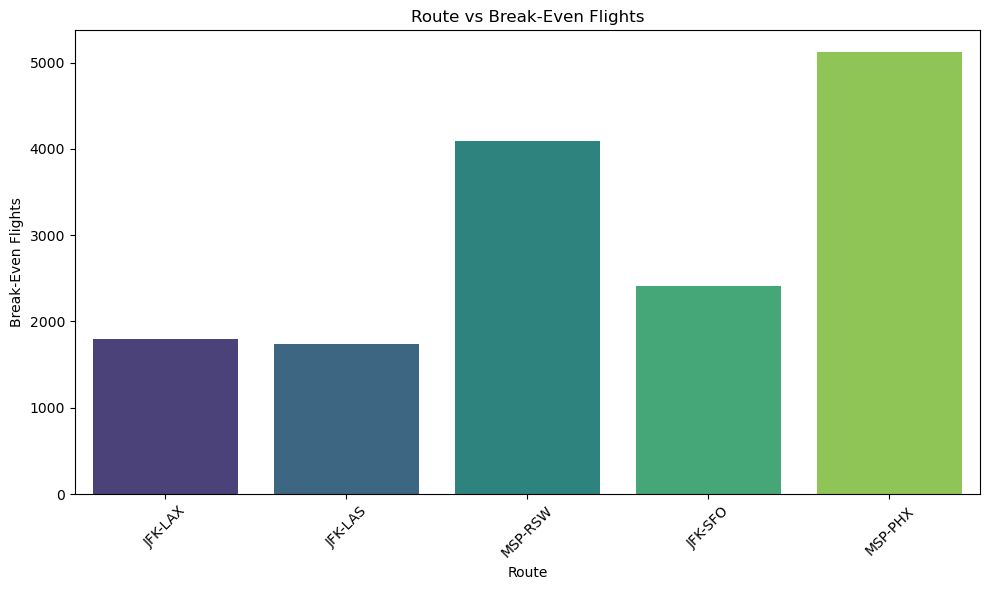

In [20]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the break-even flights as bars
sns.barplot(x='ROUTE', y='break_even_flights', data=top_5_recommended_routes, palette='viridis')
plt.xlabel('Route')
plt.ylabel('Break-Even Flights')
plt.title('Route vs Break-Even Flights')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()